# 导包 - 数据处理

In [46]:
# import package
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# load
data = np.loadtxt("./data/one_variable.txt", delimiter="\t")
X = data[:, 0].reshape(-1, 1).astype(np.float32)
y = data[:, 1].reshape(-1, 1).astype(np.float32)

In [48]:
print("数据前 5 行：")
print(data[:5])

数据前 5 行：
[[0.120431 0.136129]
 [0.676309 0.302893]
 [0.765958 0.329787]
 [0.043579 0.113074]
 [0.591529 0.277459]]


In [49]:
print("数据形状：")
print(f"X 的形状: {X.shape}")
print(f"y 的形状: {y.shape}")

数据形状：
X 的形状: (200, 1)
y 的形状: (200, 1)


In [50]:
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# 模型搭建 - 初始化 - 训练

In [51]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

# init
model = LinearRegressionModel()
criterion = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.1) 

In [52]:
# 训练模型
num_epochs = 500  # 训练轮数
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)  # 计算损失

    # 反向传播和优化
    optimizer.zero_grad()  # 清空梯度
    loss.backward()  # 反向传播计算梯度
    optimizer.step()  # 更新模型参数

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/500], Loss: 0.0053
Epoch [200/500], Loss: 0.0003
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000


In [53]:
# 打印模型参数
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# 假设模型参数已经训练完成，提取斜率和截距
slope = model.linear.weight.item()  # 提取权重作为斜率
intercept = model.linear.bias.item()  # 提取偏置作为截距

# 打印线性回归方程
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

linear.weight tensor([[0.2990]])
linear.bias tensor([0.1005])
Linear Regression Equation: y = 0.30x + 0.10


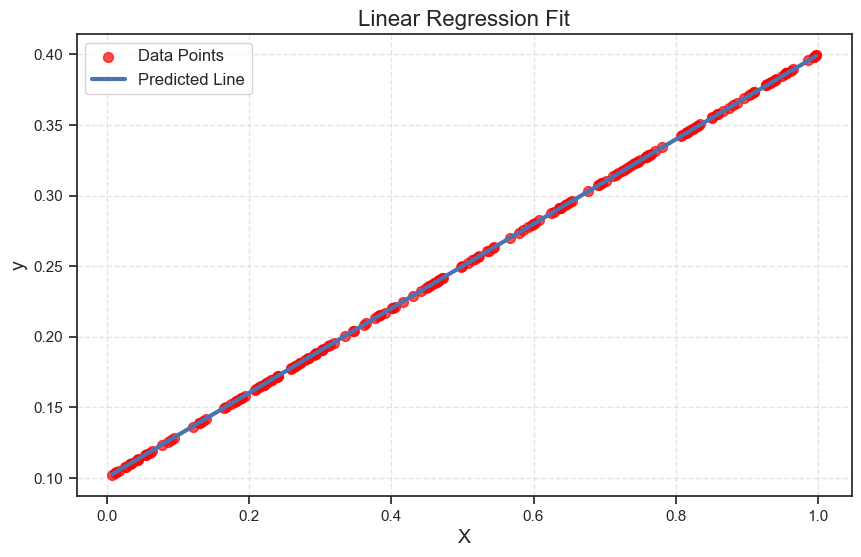

In [62]:
# 将数据转换为 Pandas DataFrame
data_df = pd.DataFrame(data, columns=["X", "y"])

# 绘制训练数据点和预测曲线
# 生成预测曲线
X_flat = X.flatten()
sorted_indices = np.argsort(X_flat)
X_sorted = X_flat[sorted_indices]
y_pred = model(torch.from_numpy(X_sorted.reshape(-1, 1))).detach().numpy()

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(data_df["X"], data_df["y"], label="Data Points",color="red", s=50, alpha=0.7)
plt.plot(X_sorted, y_pred, lw=3, label="Predicted Line")
plt.title("Linear Regression Fit", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

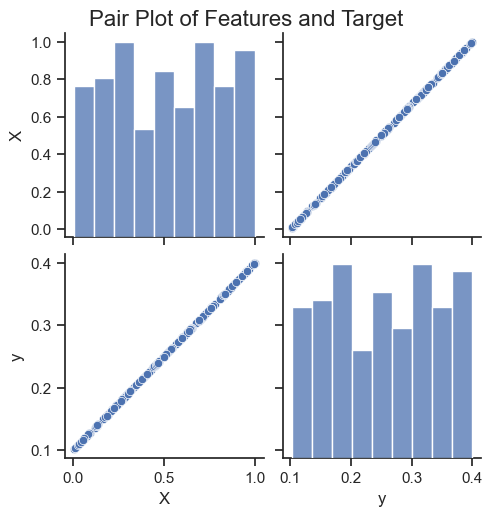

In [63]:
# 使用 Seaborn 提供的 PairPlot 来展示数据分布和相关性
sns.set(style="ticks")
sns.pairplot(data_df)
plt.suptitle("Pair Plot of Features and Target", y=1.02, fontsize=16)
plt.show()

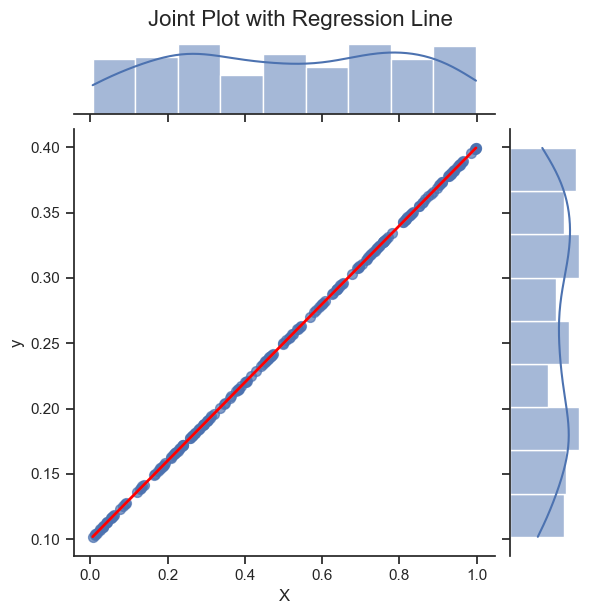

In [64]:
# 使用 Seaborn 的 JointPlot 展示更高级的双变量分布
sns.jointplot(x="X", y="y", data=data_df, kind="reg",
              joint_kws={"scatter_kws": {"s": 50, "alpha": 0.7}, "line_kws": {"color": "red", "lw": 2}})
plt.suptitle("Joint Plot with Regression Line", y=1.02, fontsize=16)
plt.show()